Patrick Anker  
Sasha   
Conducted 2016-09-20

# Introduction

The study of fluids, at the nano scale, is the analysis of how particles and their collisions scale up to our macro word. We can approximate the molecules and atoms at this scale as very small spheres, with effectively no radius. As the particles bounce off of the walls in a container exert a force on the container's walls, just like throwing a bunch of marbles against a sheet of cardboard. This force over a unit area is the *pressure* ($P$) of the gas. In order to properly describe the gas at a macro scale, we also need a way to scale about the kinetic energy of these particles. Since a determinant sum of every single particle would be absolutely dreadful to compute, we use a distribution of probable kinetic energies to find a probable total kinetic energy, which we can define as the *temperature* ($T$).

$PV = Nm < v_x^2 >\\
\to < v^2 > \approx 3< v_x^2 >\\
PV = \frac{N}{3}m < v^2 >\\
PV = \frac{2}{3}N < KE >\\
PV = NkT\\
PV = nRT$

$n$ is the molar number of particles in the system whereas $N$ is the total number of particles.

Now we have a way to describe how an *ideal* gas operates with respect to pressure, volume, and temperature. In this experiment, we study the relationship between pressure and temperature by keeping the gas's volume fixed i.e. an isochoric process. With volume acting as a constant we can verify this relationship:

$P = \frac{NkT}{V}$

which implies an existance of an *absolute zero*, where the temperature (the average *translational* kinetic energy) is 0. Since we know that 0°C is not absolute zero (it may be cold, but it's not THAT cold), we need to introduce a shift constant $T_Z$ where $T = T_C + T_Z$ and $T_C$ is the temperature reading in centigrade. This is the constant we will try to determine in this experiment.

# Materials & Methods

The centerpiece of this experiment is a *constant volume gas thermometer*, which is a hollowed cylinder and bulb connected to a Schrader valve and pressure gauge that reports the absolute pressure inside the bulb. Ideally, the bulb can be submerged into environments with differing temperatures, and thus the pressure will change directly proportionally to the temperatures of the media.

![A constant volume gas thermometer](lab1/cvgt.jpg)

To supplement the pressure readings, we had a -10°C to 110°C thermometer and a -100°C to 50°C thermometer. For safety reasons, insulated tongs and gloves were available for handling cold substances. The media that we measured in this experiment was: boiling water, ice water, dry ice in an alcohol solution, and liquid nitrogen. In order to boil the water, we had a beaker filled with water elevated above a Bunsen burner. Matches were used to ignite the burner's gas, supplied by the building.

We firstly depressed the Schrader valve of the thermometer to normalize the pressure of the bulb with the ambient room pressure. After tapping the needle a few times to make sure it was not stuck, we recorded the ambient pressure and room temperature with the constant volume gas thermometer and -10°C to 100°C thermometer, respectively. While Sasha ignited the Bunsen burner and began boiling the water, I filled our alcohol container with dry ice until our -100°C to 50°C thermometer read about -72°C (the melting point of dry ice).

Sasha measured the pressure and temperature (using the -10°C to 110°C thermometer) of the ice water while I filled the dry ice & alcohol bucket. After returning to our bench, we waited for the water to boil (*a watched pot never boils*). Once it had a rolling boil, we made sure the constant volume gas thermometer had returned to ambient room pressure. Next, one of us submerged and monitored the constant volume gas thermometer while the other submerged and monitored the -10°C to 110°C thermometer. After waiting a couple minutes, we recorded the values on the thermometers and removed the measuring equipment. After that, we let the gas thermometer return to room pressure. We repeated this procedure for the dry ice & alcohol and liquid nitrogen (except for the dry ice we used the -100°C to 50°C thermometer and did not use any thermometer for the liquid nitrogen).

For our second series of trials we joined Yvonne and Tom's group to study the effects of helium gas in the gas thermometer. After spending about 20 minutes figuring out how to evacute the gas thermometer and then add the helium from the supply tank, we repeated all of the above experiments, except for the liquid nitrogen.

# Results

In [1]:
%pylab inline --no-import-all
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Global constants
PI = np.pi
k  = 1.38064852e-23
R  = 8.3144598
NA = 6.0221409e23

V  = (4/3)*PI*(5e-2)**3.

Raw data recorded

In [3]:
# Data -- trial 1
P_1     = np.array([101.3, 125, 96, 72, 28]) # kPa
T_1     = np.array([23, 102, 6, -64, -196])  # °C
P_1_err = np.array([5, 5, 5, 5, 5])

# Data -- trial 2
P_2     = np.array([115, 110, 140, 33]) # kPa
T_2     = np.array([19, 4, 90, -196])   # °C
P_2_err = np.array([5, 5, 5, 5])

In [4]:
# Least-Squares Regression
def lsq(x, y):
    n = len(x)
    
    if n is not len(y):
        raise Exception('y vals do not match x vals')
    
    n = float(n) # Don't lose precision with int * float multiplication
    
    sum_x    = sum(x)
    sum_y    = sum(y)
    sum_x2   = sum(x**2.)
    sum_y2   = sum(y**2.)
    sum_xy   = sum(x*y)
    o_sum_x2 = (sum(x))**2.
    o_sum_y2 = (sum(y))**2.
    
    delta  = n*(sum_x2)-o_sum_x2
    deltap = n*(sum_y2)-o_sum_y2
    A  = ((sum_x2*sum_y)-(sum_x*sum_xy)) / delta
    B  = ((n*sum_xy)-(sum_x*sum_y)) / delta
    
    r  = B * (((n*sum_xy)-(sum_x*sum_y)) / deltap)
    
    sy = np.sqrt((sum(y-A-(B*x))**2.)/(n-2.))
    sa = sy * np.sqrt(sum_x2/delta)
    sb = sy * np.sqrt(n / delta)
    
    # y = A + Bx; r is correlation
    return A, B, sy, sa, sb, r

Assembling the lines

r (trial 1): 0.999217
r (trial 2): 0.999473


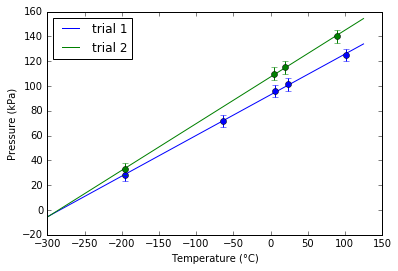

In [5]:
b_1, m_1, sy_1, sb_1, sm_1, r_1 = lsq(T_1, P_1)
b_2, m_2, sy_2, sb_2, sm_2, r_2 = lsq(T_2, P_2)

x_vals = np.linspace(-300, 125, 1000)

plt.plot(x_vals, m_1*x_vals + b_1, 'b-', label='trial 1')
plt.plot(x_vals, m_2*x_vals + b_2, 'g-', label='trial 2')

plt.errorbar(T_1, P_1, yerr=P_1_err, fmt='bo')
plt.errorbar(T_2, P_2, yerr=P_2_err, fmt='go')

plt.xlabel('Temperature (°C)')
plt.ylabel('Pressure (kPa)')

plt.legend(loc='upper left')

print('r (trial 1): %f\nr (trial 2): %f' % (r_1, r_2))

Equations of the lines

In [57]:
print('(P ± %1.3e) = (%f ± %e)T + (%f ± %e)' % (sy_1, m_1, sm_1, b_1, sb_1))
print('(P ± %1.3e) = (%f ± %e)T + (%f ± %e)' % (sy_2, m_2, sm_2, b_2, sb_2))

(P ± 2.154e-14) = (0.328102 ± 9.617037e-17)T + (92.925035 ± 9.946174e-15)
(P ± 1.209e-14) = (0.376693 ± 5.688363e-17)T + (107.316377 ± 6.159016e-15)


Define a helper function to determine the value of $\frac{b}{m}$ and its uncertainty

In [7]:
def b_on_m(_b, _m, _sb, _sm):
    return _b / _m, np.sqrt((((1./_m)*_sb)**2. + ((-_b/(_m**2.))*_sm)**2.))

In [22]:
k1, sk1 = b_on_m(b_1, m_1, sb_1, sm_1)
k2, sk2 = b_on_m(b_2, m_2, sb_2, sm_2)

print('b/m from Trial 1: %f ± %e K' % (k1, sk1))
print('b/m from Trial 2: %f ± %e K\n' % (k2, sk2))

print('Mean b/m: %3.3f ± %0.3f K' % (np.mean([k1, k2]), np.std([k1, k2]) / np.sqrt(2))) # s of mean, not data

b/m from Trial 1: 283.219855 ± 8.837661e-14 K
b/m from Trial 2: 284.890908 ± 4.602303e-14 K

Mean b/m: 284.055 ± 0.591 K


Graph of $\frac{b}{m}$ values

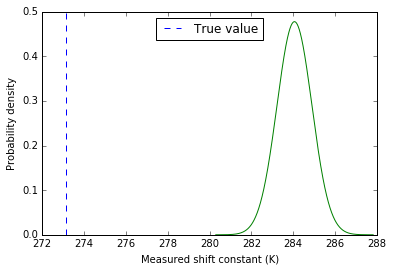

In [9]:
mu  = np.mean([k1, k2])
std = np.std([k1, k2])

x_vals = np.linspace(mu - (4.5 * std), mu + (4.5 * std), 1000)

plt.plot(x_vals, mlab.normpdf(x_vals, mu, std), 'g-')

plt.axvline(x=273.15, ls='--', label='True value')
plt.legend(loc='upper center')
plt.xlabel('Measured shift constant (K)')
plt.ylabel('Probability density')

Approximate how many moles of gas were in the constant volume gas thermometer for each trial

In [23]:
def num_particles(_P, _sP, _T):
    term1 = V / (k * _T)
    
    return ((_P * V)/(k*_T), np.abs(term1 * _sP))

num_1, snum_1 = num_particles(P_1[0], P_1_err[0], T_1[0])
num_2, snum_2 = num_particles(P_2[0], P_2_err[0], T_2[0])

print('Number of moles of air in trial 1:        %e ± %e mol' % (num_1 / NA, snum_1 / NA))
print('Number of moles of helium gas in trial 2: %e ± %e mol' % (num_2 / NA, snum_2 / NA))

Number of moles of air in trial 1:        2.773615e-04 ± 1.369010e-05 mol
Number of moles of helium gas in trial 2: 3.811613e-04 ± 1.657223e-05 mol


# Discussion

Our data strongly correlated with a linear regression (`r = 0.999217`), which is a good first step in showing that the ideal gas law (with a constant volume) will result in pressure and temperature being directly proportional. However, our measured shift constant resulted in `-284.055 ± 0.591 °C`, not the true value of `-273.15°C`. An average deviation of around 11°C may not seem like much, but considering the difference between cool and and room temperature is only 10°C this difference should be scrutinized.

The first thing to consider is the validity of the pressure measurements in the liquid nitrogen. In the lab documentation, we were instructed to treat the temperature of the liquid nitrogen as a fixed constant of -196°C. The following calculations show what our data looks like without the liquid nitrogen data points.

In [11]:
# Trial 1 w/o liquid nitrogen
P_3     = np.array([101.3, 125, 96, 72]) # kPa
T_3     = np.array([23, 102, 6, -64])  # K
P_3_err = np.array([5, 5, 5, 5])

# Trial 2 w/o liquid nitrogen
P_4     = np.array([115, 110, 140]) # kPa
T_4     = np.array([19, 4, 90])   # K
P_4_err = np.array([5, 5, 5])

r (trial 1): 0.998223
r (trial 2): 0.999939


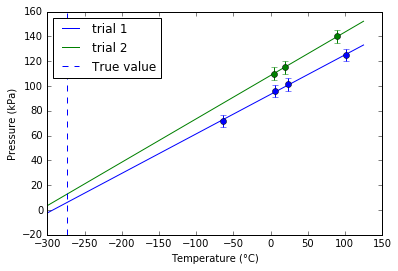

In [12]:
b_3, m_3, sy_3, sb_3, sm_3, r_3 = lsq(T_3, P_3)
b_4, m_4, sy_4, sb_4, sm_4, r_4 = lsq(T_4, P_4)

x_vals = np.linspace(-300, 125, 1000)

plt.plot(x_vals, m_3*x_vals + b_3, 'b-', label='trial 1')
plt.plot(x_vals, m_4*x_vals + b_4, 'g-', label='trial 2')

plt.errorbar(T_3, P_3, yerr=P_3_err, fmt='bo')
plt.errorbar(T_4, P_4, yerr=P_4_err, fmt='go')

plt.axvline(x=-273.15, ls='--', label='True value')
plt.xlabel('Temperature (°C)')
plt.ylabel('Pressure (kPa)')

plt.legend(loc='upper left')

print('r (trial 1): %f\nr (trial 2): %f' % (r_3, r_4))

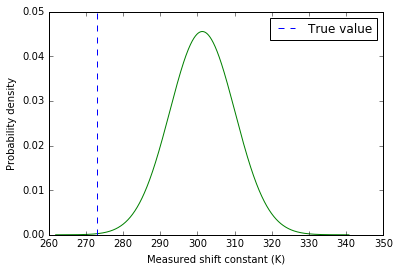

In [13]:
k3, sk3 = b_on_m(b_3, m_3, sb_3, sm_3)
k4, sk4 = b_on_m(b_4, m_4, sb_4, sm_4)

mu_2  = np.mean([k3, k4])
std_2 = np.std([k3, k4])

x_vals = np.linspace(mu_2 - (4.5 * std_2), mu_2 + (4.5 * std_2), 1000)

plt.plot(x_vals, mlab.normpdf(x_vals, mu_2, std_2), 'g-')

plt.axvline(x=273.15, ls='--', label='True value')
plt.legend(loc='upper right')
plt.xlabel('Measured shift constant (K)')
plt.ylabel('Probability density')

Without the nitrogen data points, our data actually gets further away from the true value. Evidently something else is at work. Of the measurements that we took the pressure values had the highest uncertainty with respect to the level of precision available from our instruments at hand:

In [55]:
dPP = np.mean(P_1_err) / np.mean(P_1) 
dTT = 1. / np.abs(np.mean(T_1)) # precision level was 1°C

print('Fractional uncertainty of T is {0:2.2f}% of P\'s'.format((dTT / dPP) * 100))

Fractional uncertainty of T is 65.47% of P's


While the percentage difference is relatively comparable, the uncertainty arises in the measurement itself. For the temperature, we measured the temperature of the liquid in which the constant gas thermometer was submerged. Therefore, the response on the thermometer reading was much quicker (and thus more stable) than the pressure. Furthermore, the gas inside of the bulb did not consist of a single, pure substance. Air is a mixture of 78% nitrogen, 21% oxygen, 0.9% argon, and 0.1% other trace gases. Therefore, the density of the air in the bulb was not really uniform but more of a gradient, with the heavier substances towards the bottom and lighter substances towards the top. Since the air composition is not pure, it follows that heat transfer will also be different from substance to substance e.g. the isochore heat capacitance $C_V$ of oxygen gas is $21.0 \frac{J}{mol • K}$ whereas the $C_V$ of nitrogen gas is $20.8 \frac{J}{mol • K}$. It therefore seems possible that even though the pressure gauge may have stabilized, the internal gases may not have been at uniform temperatures, and thus our temperature readings would have been lower than actuality. This is where our precision problem with the constant volume gas thermometer comes from and seems to be the reason behind why our projected lines are shifted slightly to the left of where they ought to be. As for our helium measurements, when we disconnected the hose, the pressure the in gas thermometer dropped so it's probable that while some helium escaped, some air entered the gas thermometer.

# Conclusion

Our data confirmed that in isochoric processes $P$ and $T$ are linearly related, and we found a displacement constant that would yield a value close to the true value of absolute zero. However, the difference between our measured value and the true value of -273.15°C was around 11 K (°C) which suggests that some significant systematic error was afoot. Our data was fairly accurate with respect to the linearly correlations, so accuracy was not the issue. After some investigation, I concluded that measuring the temperature of the medium (not the gas inside the bulb) would be lower than the gas in the bulb. With a more precise constant gas thermometer with a larger bulb, we would be able to increase accuracy of our computed value.